In [28]:
import json
import pickle
import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

print('All prereqs installed.')


All prereqs installed.


In [29]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Add SpacyTextBlob to the pipeline if it's not already there
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob", last=True)

print("Pipeline components:", nlp.pipe_names)  # Check if 'spacytextblob' is in the list


Pipeline components: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'spacytextblob']


In [30]:
from spacy.tokens import Doc

# Manually set polarity and subjectivity as extensions
Doc.set_extension("polarity", default=None)
Doc.set_extension("subjectivity", default=None)

# Sample sentence
text = "I love working with NLP! It's fascinating and powerful."
doc = nlp(text)

# Manually assign sentiment values (using textblob directly if needed)
from textblob import TextBlob
blob = TextBlob(doc.text)
doc._.polarity = blob.sentiment.polarity
doc._.subjectivity = blob.sentiment.subjectivity

print(f"Sentiment polarity: {doc._.polarity}")
print(f"Sentiment subjectivity: {doc._.subjectivity}")


ValueError: [E090] Extension 'polarity' already exists on Doc. To overwrite the existing extension, set `force=True` on `Doc.set_extension`.

In [ ]:
from spacy.tokens import Doc
from textblob import TextBlob

# Ensure extensions are set
Doc.set_extension("polarity", default=None, force=True)
Doc.set_extension("subjectivity", default=None, force=True)

def analyze_sentiment(text):
    # Process text with spaCy
    doc = nlp(text)
    
    # Calculate sentiment using TextBlob and assign to extensions
    blob = TextBlob(doc.text)
    doc._.polarity = blob.sentiment.polarity
    doc._.subjectivity = blob.sentiment.subjectivity
    
    # Print the results
    print(f"Text: {text}")
    print(f"Sentiment polarity: {doc._.polarity}")
    print(f"Sentiment subjectivity: {doc._.subjectivity}")
    print("-" * 50)
    
    # Return the results as a dictionary (optional)
    return {"text": text, "polarity": doc._.polarity, "subjectivity": doc._.subjectivity}


In [ ]:
# Sample sentences
sentences = [
    "I love working with NLP! It's fascinating and powerful.",
    "This product is the worst I’ve ever used.",
    "The weather today is quite average, not too exciting.",
    "I'm thrilled about this new project!",
    "I feel indifferent about this situation."
]

# Analyze each sentence
for sentence in sentences:
    analyze_sentiment(sentence)


Text: I love working with NLP! It's fascinating and powerful.
Sentiment polarity: 0.5416666666666666
Sentiment subjectivity: 0.8166666666666668
--------------------------------------------------
Text: This product is the worst I’ve ever used.
Sentiment polarity: -1.0
Sentiment subjectivity: 1.0
--------------------------------------------------
Text: The weather today is quite average, not too exciting.
Sentiment polarity: 0.075
Sentiment subjectivity: 0.6
--------------------------------------------------
Text: I'm thrilled about this new project!
Sentiment polarity: 0.3852272727272727
Sentiment subjectivity: 0.5772727272727273
--------------------------------------------------
Text: I feel indifferent about this situation.
Sentiment polarity: 0.0
Sentiment subjectivity: 0.0
--------------------------------------------------


In [ ]:
# Sample dataset (e.g., a list of reviews or social media posts)
data = [
    "The service was excellent and the staff was friendly.",
    "I am so disappointed with this experience.",
    "It was okay, not the best but not the worst either.",
    "Absolutely loved it! Will definitely come back.",
    "I don't think I'll be using this again."
]

# Analyze sentiment for each entry in the dataset
results = [analyze_sentiment(text) for text in data]

# Print summarized results (optional)
print("Sentiment Analysis Summary:")
for result in results:
    print(f"Text: {result['text'][:30]}... | Polarity: {result['polarity']}, Subjectivity: {result['subjectivity']}")


Text: The service was excellent and the staff was friendly.
Sentiment polarity: 0.6875
Sentiment subjectivity: 0.75
--------------------------------------------------
Text: I am so disappointed with this experience.
Sentiment polarity: -0.75
Sentiment subjectivity: 0.75
--------------------------------------------------
Text: It was okay, not the best but not the worst either.
Sentiment polarity: 0.16666666666666666
Sentiment subjectivity: 0.6
--------------------------------------------------
Text: Absolutely loved it! Will definitely come back.
Sentiment polarity: 0.2916666666666667
Sentiment subjectivity: 0.43333333333333335
--------------------------------------------------
Text: I don't think I'll be using this again.
Sentiment polarity: 0.0
Sentiment subjectivity: 0.0
--------------------------------------------------
Sentiment Analysis Summary:
Text: The service was excellent and ... | Polarity: 0.6875, Subjectivity: 0.75
Text: I am so disappointed with this... | Polarity: -0.75

In [ ]:
# Calculate average polarity and subjectivity
average_polarity = sum(result['polarity'] for result in results) / len(results)
average_subjectivity = sum(result['subjectivity'] for result in results) / len(results)

print("\nOverall Sentiment:")
print(f"Average Polarity: {average_polarity}")
print(f"Average Subjectivity: {average_subjectivity}")



Overall Sentiment:
Average Polarity: 0.07916666666666668
Average Subjectivity: 0.5066666666666666


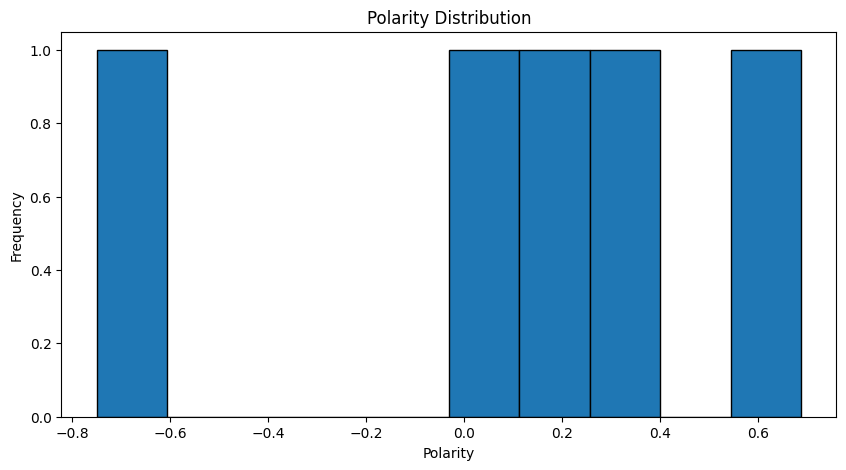

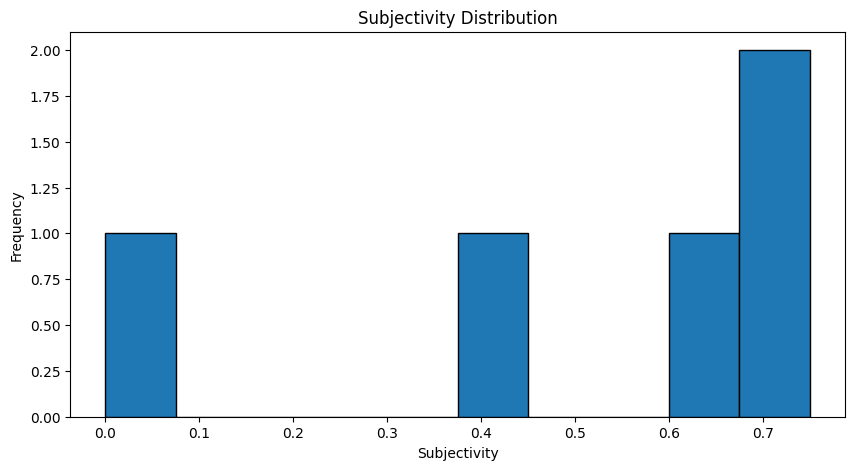

In [32]:
import matplotlib.pyplot as plt

# Collect polarity and subjectivity scores from the results
polarities = [result['polarity'] for result in results]
subjectivities = [result['subjectivity'] for result in results]

# Plot Polarity Distribution
plt.figure(figsize=(10, 5))
plt.hist(polarities, bins=10, edgecolor='black')
plt.title("Polarity Distribution")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

# Plot Subjectivity Distribution
plt.figure(figsize=(10, 5))
plt.hist(subjectivities, bins=10, edgecolor='black')
plt.title("Subjectivity Distribution")
plt.xlabel("Subjectivity")
plt.ylabel("Frequency")
plt.show()


In [34]:
# Categorize and count sentiments
positive = []
neutral = []
negative = []

for result in results:
    if result['polarity'] > 0.1:
        positive.append(result)
    elif result['polarity'] < -0.1:
        negative.append(result)
    else:
        neutral.append(result)

# Print summary of each category
print(f"Positive Sentences: {len(positive)}")
print(f"Neutral Sentences: {len(neutral)}")
print(f"Negative Sentences: {len(negative)}\n")

# Optional: Print examples of each category
print("Examples of Positive Sentences:")
for item in positive[:3]:  # Print first 3 positive sentences
    print(f"Text: {item['text']}, Polarity: {item['polarity']}")

print("\nExamples of Neutral Sentences:")
for item in neutral[:3]:  # Print first 3 neutral sentences
    print(f"Text: {item['text']}, Polarity: {item['polarity']}")

print("\nExamples of Negative Sentences:")
for item in negative[:3]:  # Print first 3 negative sentences
    print(f"Text: {item['text']}, Polarity: {item['polarity']}")


Positive Sentences: 3
Neutral Sentences: 1
Negative Sentences: 1

Examples of Positive Sentences:
Text: The service was excellent and the staff was friendly., Polarity: 0.6875
Text: It was okay, not the best but not the worst either., Polarity: 0.16666666666666666
Text: Absolutely loved it! Will definitely come back., Polarity: 0.2916666666666667

Examples of Neutral Sentences:
Text: I don't think I'll be using this again., Polarity: 0.0

Examples of Negative Sentences:
Text: I am so disappointed with this experience., Polarity: -0.75
